# Imports

In [2]:
import pandas as pd
import matplotlib
import logging
import urllib
import json

from haralyzer import HarParser
from pprint import pprint

# Enviroment Setup

In [3]:
logging_config = {
        'version': 1,
        'formatters': {
            'default': {
                'format': '%(asctime)s - %(levelname)s - %(message)s',
                'datefmt': '%Y-%m-%d %H:%M:%S'
            }
        },
        'handlers': {
            'console': {
                'level': 'DEBUG',
                'class': 'logging.StreamHandler',
                'formatter': 'default',
                'stream': 'ext://sys.stdout'
            }
        },
        'loggers': {
            'default': {
                'level': 'DEBUG',
                'handlers': ['console']
            }
        },
        'disable_existing_loggers': False
    }

In [4]:
logging.config.dictConfig(logging_config)
logger = logging.getLogger('default')

In [5]:
logger.info('some bullshit')

2023-08-19 17:37:14 - INFO - some bullshit


# Functions, Classes & Constants

## Functions

In [6]:
def normalize_yearly_earning(df_row: pd.core.series.Series) -> None:
    """Computes an estimated full year Gross365 for cars that have been on the market
    for less than a year
    """
    # pprint(df_row)
    if df_row['Days'] > 365:
        df_row['Gross365_estimated'] = df_row['Gross365']
    else:
        try:
            df_row['Gross365_estimated'] = df_row['Gross365'] / (365 / df_row['Gross365'])
        except ZeroDivisionError:
            df_row['Gross365_estimated'] = df_row['Gross365']

    return df_row

## Classes

## Constants

In [7]:
turo_data_file = "/Users/karim/Downloads/Turo-Explorer-Data-montreal-20230818.csv"

In [8]:
turo_df = pd.read_csv(turo_data_file)

# Workflow 1: Get unique makes (car brands) from data pull

In [9]:
all_makes = turo_df["Make"].unique()

In [10]:
print(f"There are {len(all_makes)} car makes in on all_make")
pprint(all_makes)

There are 36 car makes in on all_make
array(['Ram', 'BMW', 'Chrysler', 'Nissan', 'Toyota', 'FIAT', 'Porsche',
       'Mercedes-Benz', 'Audi', 'Hyundai', 'Honda', 'Volkswagen',
       'Lincoln', 'Chevrolet', 'Ford', 'Volvo', 'Jeep', 'Subaru', 'Lexus',
       'Cadillac', 'Mazda', 'Jaguar', 'Mitsubishi', 'Buick', 'Kia',
       'smart', 'Scion', 'Genesis', 'Maserati', 'Dodge', 'MINI', 'Acura',
       'Tesla', 'INFINITI', 'Land Rover', 'GMC'], dtype=object)


# Worlflow 2: How many records of each car make in the dataset

In [11]:
unique_makes_counts = turo_df['Make'].value_counts()
unique_makes_perc = turo_df['Make'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

unique_makes_breakdown = pd.concat([unique_makes_counts, unique_makes_perc], axis = 1, keys=['count', 'percentage'])
pprint(unique_makes_breakdown[:10])

"""
To represent value_counts as stats: https://www.statology.org/pandas-value_counts-percentage/#:~:text=You%20can%20use%20the%20value_counts,given%20column%20of%20a%20DataFrame.
"""

               count percentage
Toyota            49      10.3%
Honda             42       8.8%
Nissan            41       8.6%
Hyundai           41       8.6%
Mercedes-Benz     30       6.3%
Tesla             26       5.5%
Kia               24       5.1%
BMW               22       4.6%
Chevrolet         22       4.6%
Volkswagen        21       4.4%


'\nTo represent value_counts as stats: https://www.statology.org/pandas-value_counts-percentage/#:~:text=You%20can%20use%20the%20value_counts,given%20column%20of%20a%20DataFrame.\n'

# Workflow 3: How does daily rate correlate with total yearly revenue


<AxesSubplot:xlabel='Gross365', ylabel='$day'>

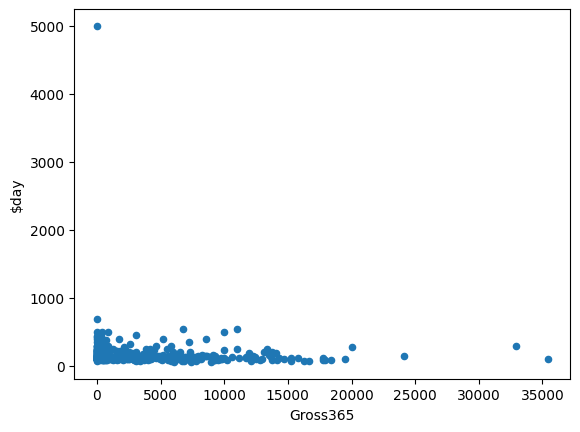

In [12]:
turo_df.plot.scatter('Gross365', '$day')

There no discernable relation and that is because the data doesn't take into account  
how many days the car has been in the market

# Worflow 4: What is the distibution of the number of days that the cars have been available?

<AxesSubplot:ylabel='Frequency'>

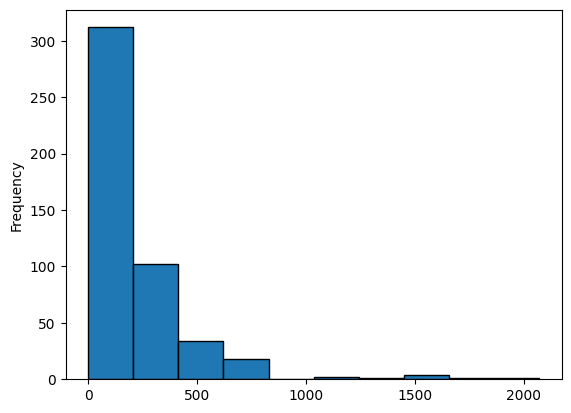

In [13]:
"""
Documentation on creating histograms of data distributions:
https://sparkbyexamples.com/pandas/plot-distribution-of-column-values-in-pandas/


"""
turo_df['Days'].plot(kind='hist', edgecolor='black')

# Workflow 5: Normalize Gross365 field for cars that have been on the market for less than a year

In [14]:
turo_df = turo_df.apply(normalize_yearly_earning, axis=1)

# Workflow 6: Correlation between $rate and Gross365_estimated

<AxesSubplot:xlabel='Gross365_estimated', ylabel='$day'>

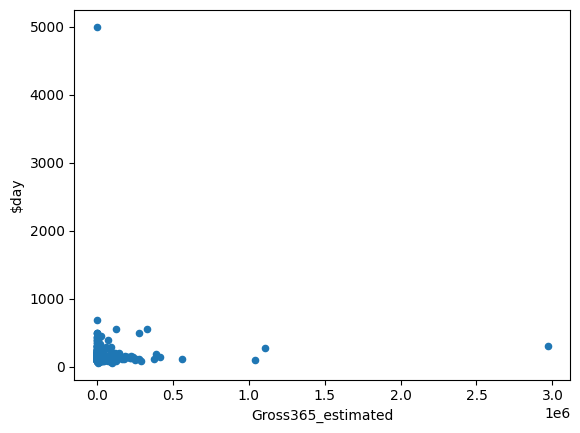

In [15]:
turo_df.plot.scatter('Gross365_estimated', '$day')

# Workflow 7: Read HAR files

In [16]:
turo_har_data = HarParser.from_file('./data/turo.com.har').har_data

In [17]:
turo_har_data.keys()

dict_keys(['version', 'creator', 'pages', 'entries'])

In [18]:
len(turo_har_data['entries'])

924

## Get all _connections from turo_har_data['entries']

In [19]:
_initiators = []
for entry in turo_har_data['entries']:
    _initiators.append(entry['_initiator']['type'])

print(f"_initiators list has {len(_initiators)} entries")
_initiators = set(_initiators)
print(f"_initiators set has {len(_initiators)} entries")
print(_initiators)


_initiators list has 924 entries
_initiators set has 3 entries
{'script', 'other', 'preflight'}


## Get all connections turo_har_data['entries'][idx]['connection']

In [20]:
_connections = []
for entry in turo_har_data['entries']:
    try:
        _connections.append(entry['connection'])
    except Exception as e:
        print(e)
print(f"_connections list has {len(_connections)} entries")
_connections = set(_connections)
print(f"_connections set has {len(_connections)} entries")
print(_connections)

'connection'
'connection'
'connection'
_connections list has 921 entries
_connections set has 146 entries
{'534620', '535222', '535943', '532405', '537467', '537293', '532395', '536154', '538620', '541099', '532270', '538222', '532190', '538449', '534434', '536465', '536058', '534329', '535326', '532458', '540783', '533333', '539809', '532130', '556801', '531824', '537554', '541395', '532742', '538047', '532339', '533710', '533786', '534012', '532873', '537135', '536789', '537640', '532758', '533509', '539511', '534003', '537790', '532418', '537119', '535825', '540193', '537240', '536230', '534732', '531865', '532125', '532265', '534151', '533025', '534859', '537050', '532901', '535102', '533009', '533314', '538401', '534843', '537962', '532490', '538031', '534418', '591287', '538621', '535762', '584937', '536979', '533694', '532387', '533588', '538146', '532088', '532639', '533218', '560565', '533865', '532113', '534230', '537860', '532305', '536322', '537221', '534604', '538460', '53

## Get all methods turo_har_data['entries'][idx]['request']['method']

In [21]:
_methods = []
for entry in turo_har_data['entries']:
    try:
        _methods.append(entry['request']['method'])
    except Exception as e:
        print(e)
print(f"_methods list has {len(_methods)} entries")
_methods = set(_methods)
print(f"_methods set has {len(_methods)} entries")
print(_methods)

_methods list has 924 entries
_methods set has 3 entries
{'GET', 'OPTIONS', 'POST'}


## Get all urls turo_har_data['entries'][idx]['request']['url']

In [22]:
_domains = []
for entry in turo_har_data['entries']:
    try:
        _url_domain = urllib.parse.urlparse(entry['request']['url']).netloc
        _domains.append(_url_domain)
    except Exception as e:
        print(e)
print(f"_domains list has {len(_domains)} entries")
_domains = set(_domains)
print(f"_domains set has {len(_domains)} entries")
pprint(_domains)

_domains list has 924 entries
_domains set has 18 entries
{'analytics.google.com',
 'api.avo.app',
 'api.segment.io',
 'bam.nr-data.net',
 'googleads.g.doubleclick.net',
 'images.turo.com',
 'maps.googleapis.com',
 'maps.gstatic.com',
 'marketvalue.vinaudit.com',
 'ownershipcost.vinaudit.com',
 'resources.turo.com',
 'sessions.bugsnag.com',
 'simonsignal.com',
 'static.simonsignal.com',
 'trc-events.taboola.com',
 'turo.com',
 'www.google.com',
 'www.googleadservices.com'}


## Get all entries that have the domain turo.com

In [23]:
turo_domain_entries = []
for entry in turo_har_data['entries']:
    try:
        _url_domain = urllib.parse.urlparse(entry['request']['url']).netloc
        if _url_domain == 'turo.com':
            turo_domain_entries.append(entry)    
    except Exception as e:
        print(e)
    
print(f"turo_domain_entries list has {len(turo_domain_entries)} entries")
_domains = set(_domains)

turo_domain_entries list has 411 entries


In [24]:
pprint(turo_domain_entries[0])

{'_initiator': {'stack': {'callFrames': [{'columnNumber': 172,
                                          'functionName': 'window.fetch',
                                          'lineNumber': 0,
                                          'scriptId': '15',
                                          'url': 'chrome-extension://kcekmgedcdnjjfcklokfidemgjdanjpp/src/pages/fetch/index.js'},
                                         {'columnNumber': 5822,
                                          'functionName': 't.<computed>',
                                          'lineNumber': 61,
                                          'scriptId': '26',
                                          'url': 'https://turo.com/ca/en/search?country=CA&defaultZoomLevel=12.31037748858309&endDate=08%2F20%2F2023&endTime=10%3A00&isMapSearch=true&itemsPerPage=200&latitude=45.53740261613008&location=Map%20location&locationType=MAP&longitude=-73.55286733962583&northEastLatitude=45.59699139489581&northEastLongitude=-73.4

### Insepct the first element's response in turo_domain_entries


In [25]:
print(turo_domain_entries[0]['response'].keys())
print(turo_domain_entries[0]['response']['status'])

idx = 0 
if turo_domain_entries[idx]['response']['status'] == 200:
    # pprint(turo_domain_entries[idx]['response']['content']['text'])
    response_json = json.loads(turo_domain_entries[idx]['response']['content']['text'])
    pprint(response_json)
else:
    print('Error: ', turo_domain_entries[idx]['response']['status'])

dict_keys(['status', 'statusText', 'httpVersion', 'headers', 'cookies', 'content', 'redirectURL', 'headersSize', 'bodySize', '_transferSize', '_error'])
200
{'banner': {'actionText': None,
            'bannerDesign': {'animationLoopCount': None,
                             'animationURL': None,
                             'clickableURL': None,
                             'designVariant': None,
                             'resizeableIconDarkURL': 'https://resources.turo.com/resources/img/banner/thumbs-up-dark__H6f7aeec8335a018494e506131904a399__.jpg',
                             'resizeableIconURL': 'https://resources.turo.com/resources/img/banner/thumbs-up__H8e2ff43641228b6c6246c70974174b4a__.jpg',
                             'withBorder': True},
            'bannerName': 'CHECKOUT_MORE_THAN_25_HR',
            'text': 'Don’t stress: you can cancel your trip for free, up to 24 '
                    'hours before it starts.',
            'title': None},
 'dismissibleBanner': None,

### Verify that all entries with domain of turo.com have url =='https://turo.com/api/v2/search'

In [26]:
stripped_urls = [] 
for entry in turo_domain_entries:
    stripped_url = entry['request']['url'].split('?')[0]
    # print(stripped_url)
    stripped_urls.append(stripped_url)
print(f"stripped_urls list has {len(stripped_urls)} entries")
stripped_urls = set(stripped_urls)
print(f"stripped_urls set has {len(stripped_urls)} entries")
pprint(stripped_urls)

stripped_urls list has 411 entries
stripped_urls set has 4 entries
{'https://turo.com/api/bulk-quotes/v2',
 'https://turo.com/api/v2/search',
 'https://turo.com/api/vehicle/daily_pricing',
 'https://turo.com/api/vehicle/detail'}


requests to turo.com can be to any of the following:   
- 'https://turo.com/api/bulk-quotes/v2'
- 'https://turo.com/api/v2/search'
- 'https://turo.com/api/vehicle/daily_pricing'
- 'https://turo.com/api/vehicle/detail'

### inspect requests that go to a bulk-quotes path

In [27]:
for entry in turo_domain_entries:
    print('entry')
    if entry['request']['url'].split('?')[0] == 'https://turo.com/api/bulk-quotes/v2':
        _bulk_quotes_request = entry
        break
        

entry
entry


In [28]:
print("#########################################")
pprint(f"_bulk_quotes_request.keys(): \n{_bulk_quotes_request.keys()}")
print("#########################################")
pprint(f"_bulk_quotes_request['response'].keys():\n {_bulk_quotes_request['response'].keys()}")

_bulk_quotes_request_payload = json.loads(_bulk_quotes_request['response']['content']['text'])
print("#########################################")
print(f"len(_bulk_quotes_request_payload['estimatedQuotes']): {len(_bulk_quotes_request_payload['estimatedQuotes'])}")
pprint(f"_bulk_quotes_request_payload['estimatedQuotes'].keys():\n {_bulk_quotes_request_payload['estimatedQuotes'].keys()}")


#########################################
('_bulk_quotes_request.keys(): \n'
 "dict_keys(['_initiator', '_priority', '_resourceType', 'cache', "
 "'connection', 'request', 'response', 'serverIPAddress', 'startedDateTime', "
 "'time', 'timings'])")
#########################################
("_bulk_quotes_request['response'].keys():\n"
 " dict_keys(['status', 'statusText', 'httpVersion', 'headers', 'cookies', "
 "'content', 'redirectURL', 'headersSize', 'bodySize', '_transferSize', "
 "'_error'])")
#########################################
len(_bulk_quotes_request_payload['estimatedQuotes']): 20
("_bulk_quotes_request_payload['estimatedQuotes'].keys():\n"
 " dict_keys(['2028926', '2146720', '2065086', '2149603', '2028253', "
 "'1204401', '2136547', '2138439', '2002068', '2159691', '1543514', '2129742', "
 "'2099247', '2119186', '1346912', '2175637', '1382304', '1726275', '2065027', "
 "'2099580'])")


bulk request API endpoint return quotes using offered daily price for a specific subset of cars on offer 

# Workflow 8: Merge HAR data into datafram from base Turex data pull and add an average daily price column

### Pull average daily rate from turo_domain_entries

In [29]:
search_api_request = json.loads(turo_domain_entries[0]['response']['content']['text'])

In [30]:
print(search_api_request.keys())
print(f"len(search_api_request['vehicles']): {len(search_api_request['vehicles'])}")
print("\n#########################################")
print(f"search_api_request['vehicles'][0].keys():")
pprint(list(search_api_request['vehicles'][0].keys()))
car_id = search_api_request['vehicles'][0]['id']
avgDailyPrice = search_api_request['vehicles'][0]['avgDailyPrice']['amount']
make = search_api_request['vehicles'][0]['make']
print("\n#########################################")
print(f"Car {car_id} is a {make} with and ADR of {avgDailyPrice}")

dict_keys(['banner', 'dismissibleBanner', 'searchId', 'searchLocation', 'vehicles'])
len(search_api_request['vehicles']): 200

#########################################
search_api_request['vehicles'][0].keys():
['avgDailyPrice',
 'completedTrips',
 'estimatedQuote',
 'hostId',
 'id',
 'images',
 'isAllStarHost',
 'isFavoritedBySearcher',
 'isNewListing',
 'location',
 'make',
 'model',
 'rating',
 'tags',
 'type',
 'year']

#########################################
Car 2175637 is a Maserati with and ADR of 200.0


### Create dataframe that gave car_ID & avg_daily_rate columns

### Merge the ADR and Turex dataframes

# Debug

In [31]:
turo_df.loc[100]

ID                                                              2139993
City                                                          Laval, QC
Type                                                                CAR
Make                                                              Honda
Model                                                             Civic
Year                                                               2022
Color                                                               NaN
Trim                                                              Sport
CreatedAt                                                     7/23/2023
Days                                                                 26
Trips                                                                 0
T/D                                                                 0.0
$day                                                                250
Busy30                                                          

In [32]:
# len(turo_df) # 475 rows

In [33]:
turo_df.columns
"""
Index(['ID', 'City', 'Type', 'Make', 'Model', 'Year', 'Color', 'Trim',
       'CreatedAt', 'Days', 'Trips', 'T/D', '$day', 'Busy30', 'Gross30',
       'Gross365', 'Plan', 'Favs', 'Reviews', 'StarHost', 'URL', 'Features',
       'Avg Market $*', 'Depreciation Y1*', 'Insurance Y*', 'Maintenance Y*',
       'Avg Repairs Y*'],
      dtype='object')
"""


"\nIndex(['ID', 'City', 'Type', 'Make', 'Model', 'Year', 'Color', 'Trim',\n       'CreatedAt', 'Days', 'Trips', 'T/D', '$day', 'Busy30', 'Gross30',\n       'Gross365', 'Plan', 'Favs', 'Reviews', 'StarHost', 'URL', 'Features',\n       'Avg Market $*', 'Depreciation Y1*', 'Insurance Y*', 'Maintenance Y*',\n       'Avg Repairs Y*'],\n      dtype='object')\n"

In [34]:
max(turo_df['Gross365_estimated'])

2970195.8246575342

In [35]:

temp_record_2065086 = turo_df[turo_df['ID']==2065086]
temp_record_2065086[['Days', 'Trips', 'Gross365','Make','$day']]

,Days,Trips,Gross365,Make,$day
458,73,3,2447,BMW,150


In [36]:
2447/150/3

5.437777777777778